# Color Spaces

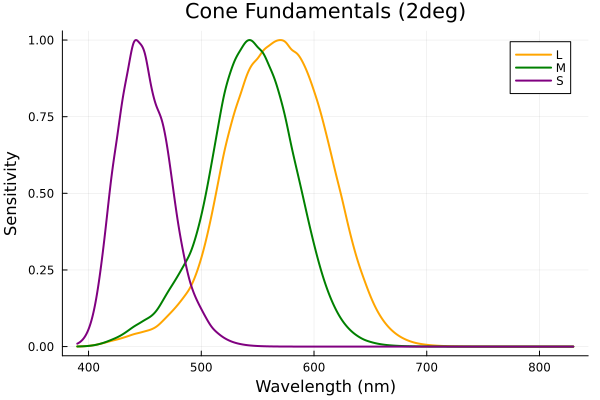

In [1]:
using ColorLab,LinearAlgebra,YAML,WGLMakie,Colors,KernelDensity
import Plots

"Get RGB color spectra measured from a specific display"
function RGBSpectra(measurement)
    C = map(i->parse.(Float64,split(i)),measurement["Color"])
    λ = measurement["WL"]
    I = measurement["Spectral"]
    return C,λ,I
end

Plots.plot(sscone2le[:,1],sscone2le[:,2:end],linewidth=2,color=["orange" "Green" "purple"],xlabel="Wavelength (nm)",ylabel="Sensitivity",label=["L" "M" "S"],title="Cone Fundamentals (2deg)")

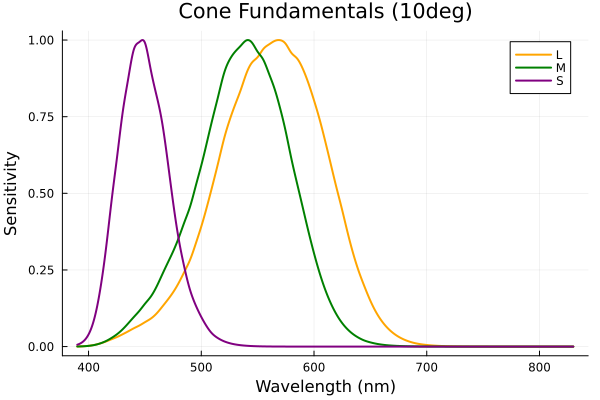

In [2]:
Plots.plot(sscone10le[:,1],sscone10le[:,2:end],linewidth=2,color=["orange" "Green" "purple"],xlabel="Wavelength (nm)",ylabel="Sensitivity",label=["L" "M" "S"],title="Cone Fundamentals (10deg)")

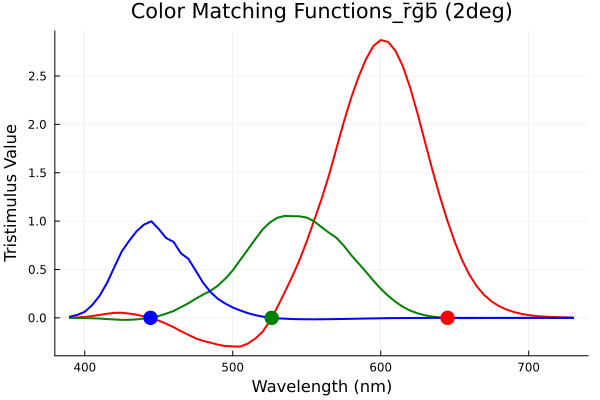

In [3]:
Plots.plot(sbrgb2[:,1],sbrgb2[:,2:end],linewidth=2,color=["Red" "Green" "Blue"],xlabel="Wavelength (nm)",ylabel="Tristimulus Value",label=["r" "g" "b"],title="Color Matching Functions_r̄ḡb̄ (2deg)")
Plots.scatter!(sbrgb_primary',zeros(3)',markersize=8,markerstrokewidth=0,markercolor=["Red" "Green" "Blue"],legend=false)

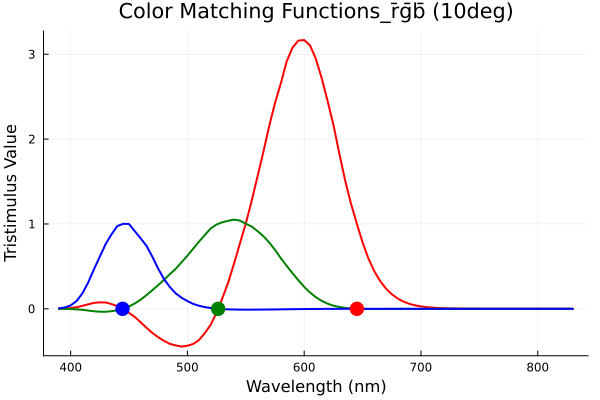

In [4]:
Plots.plot(sbrgb10[:,1],sbrgb10[:,2:end],linewidth=2,color=["Red" "Green" "Blue"],xlabel="Wavelength (nm)",ylabel="Tristimulus Value",label=["r" "g" "b"],title="Color Matching Functions_r̄ḡb̄ (10deg)")
Plots.scatter!(sbrgb_primary',zeros(3)',markersize=8,markerstrokewidth=0,markercolor=["Red" "Green" "Blue"],legend=false)


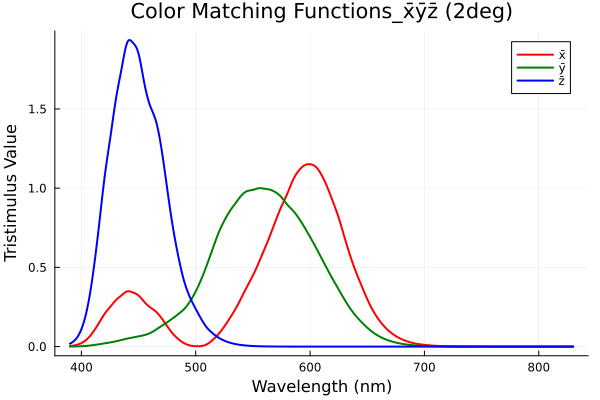

In [6]:
x̄ȳz̄2 = cmf(LMSToXYZ2,sscone2le)
Plots.plot(x̄ȳz̄2[:,1],x̄ȳz̄2[:,2:end],linewidth=2,color=["Red" "Green" "Blue"],xlabel="Wavelength (nm)",ylabel="Tristimulus Value",label=["x̄" "ȳ" "z̄"],title="Color Matching Functions_x̄ȳz̄ (2deg)")

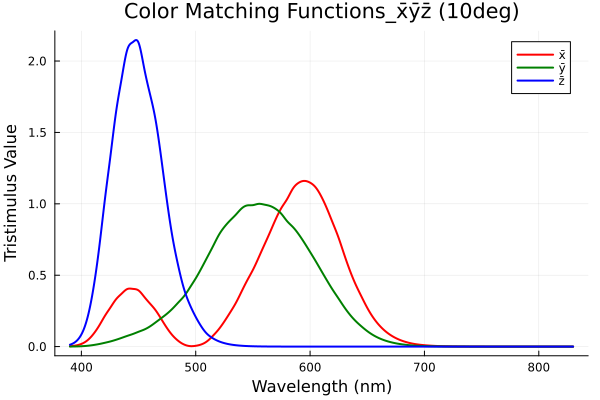

In [7]:
x̄ȳz̄10 = cmf(LMSToXYZ10,sscone10le)
Plots.plot(x̄ȳz̄10[:,1],x̄ȳz̄10[:,2:end],linewidth=2,color=["Red" "Green" "Blue"],xlabel="Wavelength (nm)",ylabel="Tristimulus Value",label=["x̄" "ȳ" "z̄"],title="Color Matching Functions_x̄ȳz̄ (10deg)")

## Spectral Measurement of a Display

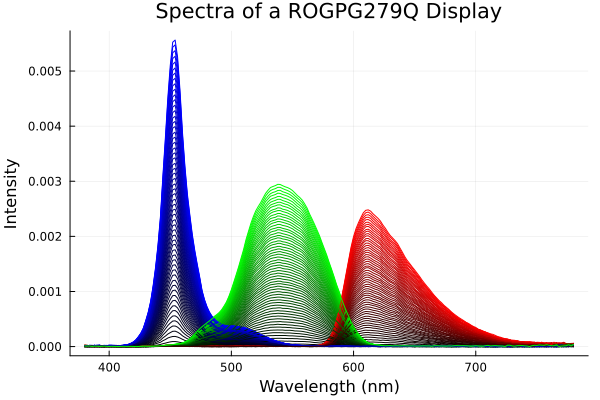

In [8]:
displaymeasure = YAML.load_file(joinpath(@__DIR__,"DisplayMeasurement.yaml"))
displayname = "ROGPG279Q" # ASUS ROG Swift PG279Q IPS LCD
# displayname = "VX3276mhd" # ViewSonic VX3276mhd IPS LCD
# displayname = "Trinitron" # Sony Trinitron CRT
Cs = RGBSpectra(displaymeasure[displayname]["SpectralMeasurement"])
observer = 10
RGBToLMS,LMSToRGB = RGBLMSMatrix(Cs...;observer)
RGBToXYZ,XYZToRGB = RGBXYZMatrix(Cs...;observer,f=nothing)

Plots.plot(stack(Cs[2]),stack(Cs[3]),color=[RGBA(c...) for c in Cs[1]]',leg=false,xlabel="Wavelength (nm)",ylabel="Intensity",title="Spectra of a $displayname Display")

## Unit Cube

In [9]:
up=[Float32[i,j,k] for i=0:0.01:1,j=0:0.01:1,k=0:0.01:1] |> vec
uc=homovector(stack(up))
ucolor = [RGB(i...) for i in up]
uacolor = [RGBA(i...,0.02) for i in up]
markersize=3
transparency=true
scatter(uc[1,:],uc[2,:],uc[3,:];color=ucolor,markersize,transparency,axis=(;type=Axis3,aspect=:data,xlabel="R",ylabel="G",zlabel="B"))

## Transformation between Display RGB and LMS

In [10]:
LMS_uc = RGBToLMS*uc
RGB_ulms = LMSToRGB*uc
f,ax,p=scatter(uc[1,:],uc[2,:],uc[3,:];color=uacolor,markersize,transparency,axis=(;type=Axis3,aspect=:data,xlabel="R / L",ylabel="G / M",zlabel="B / S"))
scatter!(LMS_uc[1,:],LMS_uc[2,:],LMS_uc[3,:];color=ucolor,markersize,transparency)
f

In [11]:
f,ax,p = scatter(uc[1,:],uc[2,:],uc[3,:];color=uacolor,markersize,transparency,axis=(;type=Axis3,aspect=:data,xlabel="L / R",ylabel="M / G",zlabel="S / B"))
scatter!(RGB_ulms[1,:],RGB_ulms[2,:],RGB_ulms[3,:];color=ucolor,markersize,transparency)
f

## Transformation between Display RGB and CIE XYZ

In [12]:
XYZ_uc = RGBToXYZ*uc
RGB_uxyz = XYZToRGB*uc
f,ax,p=scatter(uc[1,:],uc[2,:],uc[3,:];color=uacolor,markersize,transparency,axis=(;type=Axis3,aspect=:data,xlabel="R / X",ylabel="G / Y",zlabel="B / Z"))
scatter!(XYZ_uc[1,:],XYZ_uc[2,:],XYZ_uc[3,:];color=ucolor,markersize,transparency)
f

In [13]:
f,ax,p = scatter(uc[1,:],uc[2,:],uc[3,:];color=uacolor,markersize,transparency,axis=(;type=Axis3,aspect=:data,xlabel="X / R",ylabel="Y / G",zlabel="Z / B"))
scatter!(RGB_uxyz[1,:],RGB_uxyz[2,:],RGB_uxyz[3,:];color=ucolor,markersize,transparency)
f

## Transformation between CIE XYZ and CIE xyY

In [14]:
xyY_uxyz = XYZ2xyY(uc)
XYZ_uxyy = xyY2XYZ(uc)
f,ax,p=scatter(uc[1,:],uc[2,:],uc[3,:];color=uacolor,markersize,transparency,axis=(;type=Axis3,aspect=:data,xlabel="X / x",ylabel="Y / y",zlabel="Z / Y"))
scatter!(xyY_uxyz[1,:],xyY_uxyz[2,:],xyY_uxyz[3,:];color=ucolor,markersize,transparency)
f

In [15]:
f,ax,p = scatter(uc[1,:],uc[2,:],uc[3,:];color=uacolor,markersize,transparency,axis=(;type=Axis3,aspect=:data,xlabel="x / X",ylabel="y / Y",zlabel="Y / Z"))
scatter!(XYZ_uxyy[1,:],XYZ_uxyy[2,:],XYZ_uxyy[3,:];color=ucolor,markersize,transparency)
f

## Transformation between LMS and Cone Contrast

In [16]:
bg = fill(0.5,3)
BGrgb = homovector(bg)
BGlms = RGBToLMS*BGrgb
LMSToContrast,ContrastToLMS = LMSContrastMatrix(BGlms)
CC_ulms = LMSToContrast*uc
LMS_ucc = ContrastToLMS*uc
f,ax,p=scatter(uc[1,:],uc[2,:],uc[3,:];color=uacolor,markersize,transparency,axis=(;type=Axis3,aspect=:data,xlabel="L / Cₗ",ylabel="M / Cₘ",zlabel="S / Cₛ"))
scatter!(CC_ulms[1,:],CC_ulms[2,:],CC_ulms[3,:];color=ucolor,markersize,transparency)
f

In [17]:
f,ax,p = scatter(uc[1,:],uc[2,:],uc[3,:];color=uacolor,markersize,transparency,axis=(;type=Axis3,aspect=:data,xlabel="Cₗ / L",ylabel="Cₘ / M",zlabel="Cₛ / S"))
scatter!(LMS_ucc[1,:],LMS_ucc[2,:],LMS_ucc[3,:];color=ucolor,markersize,transparency)
f

## Transformation between LMS and DKL

In [18]:
LMSToDKL,DKLToLMS = LMSDKLMatrix(BGlms;observer)
DKL_ulms = LMSToDKL*uc
LMS_udkl = DKLToLMS*uc
f,ax,p=scatter(uc[1,:],uc[2,:],uc[3,:];color=uacolor,markersize,transparency,axis=(;type=Axis3,aspect=:data,xlabel="L / Lum",ylabel="M / L-M",zlabel="S / S-(L+M)"))
scatter!(DKL_ulms[1,:],DKL_ulms[2,:],DKL_ulms[3,:];color=ucolor,markersize,transparency)
f

In [19]:
f,ax,p = scatter(uc[1,:],uc[2,:],uc[3,:];color=uacolor,markersize,transparency,axis=(;type=Axis3,aspect=:data,xlabel="Lum / L",ylabel="L-M / M",zlabel="S-(L+M) / S"))
scatter!(LMS_udkl[1,:],LMS_udkl[2,:],LMS_udkl[3,:];color=ucolor,markersize,transparency)
f

## Cone Isolating Modulation Range

In [21]:
cd=kde(LMS_uc[2:3,:]')
f,ax,p=surface(cd.x,cd.y,cd.density,colormap=:reds)
lines!([0,0].+BGlms[2],[0,0].+BGlms[3],[0,1.2],linewidth=3,color=:gray)
f

In [22]:
cd=kde(LMS_uc[[1,3],:]')
f,ax,p=surface(cd.x,cd.y,cd.density,colormap=:greens)
lines!([0,0].+BGlms[1],[0,0].+BGlms[3],[0,1.2],linewidth=3,color=:gray)
f

In [23]:
cd=kde(LMS_uc[1:2,:]')
f,ax,p=surface(cd.x,cd.y,cd.density,colormap=:blues)
lines!([0,0].+BGlms[1],[0,0].+BGlms[2],[0,1.2],linewidth=3,color=:gray)
f

## Cone Isolating RGB through background

In [24]:
# Each column of LMSToRGB is the cone isolating RGB direction
ConeIsoRGBVec = dehomomatrix(LMSToRGB)
# Scale RGB Vector into Unit Cube
ConeIsoRGBVec./=maximum(abs.(ConeIsoRGBVec),dims=1)
# Since bg color is the center of RGB cube, the line intersects at two symmatric points on the faces of unit cube
minrgb_lmsiso = bg.-0.5*ConeIsoRGBVec;maxrgb_lmsiso = bg.+0.5*ConeIsoRGBVec
ConeIsoRGB = map((i,j)->collect(i.+j), minrgb_lmsiso,[0:0.001:1].*(maxrgb_lmsiso.-minrgb_lmsiso))

Lisorgb = stack(ConeIsoRGB[:,1])'
Lisocolor = [RGB(i...) for i in eachslice(Lisorgb,dims=2)]
Lisolms=RGBToLMS*homovector(Lisorgb)

Misorgb = stack(ConeIsoRGB[:,2])'
Misocolor = [RGB(i...) for i in eachslice(Misorgb,dims=2)]
Misolms=RGBToLMS*homovector(Misorgb)

Sisorgb = stack(ConeIsoRGB[:,3])'
Sisocolor = [RGB(i...) for i in eachslice(Sisorgb,dims=2)]
Sisolms=RGBToLMS*homovector(Sisorgb)

display.([Lisocolor, Misocolor, Sisocolor]);


In [25]:
f,ax,p=scatter(LMS_uc[1,:],LMS_uc[2,:],LMS_uc[3,:];color=uacolor,markersize,transparency,axis=(;type=Axis3,aspect=:data,xlabel="L",ylabel="M",zlabel="S"))
scatter!(Lisolms[1,:],Lisolms[2,:],Lisolms[3,:];color=Lisocolor,markersize,transparency)
scatter!(Misolms[1,:],Misolms[2,:],Misolms[3,:];color=Misocolor,markersize,transparency)
scatter!(Sisolms[1,:],Sisolms[2,:],Sisolms[3,:];color=Sisocolor,markersize,transparency)
f

In [26]:
f,ax,p=scatter(uc[1,:],uc[2,:],uc[3,:];color=uacolor,markersize,transparency,axis=(;type=Axis3,aspect=:data,xlabel="R",ylabel="G",zlabel="B"))
scatter!(Lisorgb[1,:],Lisorgb[2,:],Lisorgb[3,:];color=Lisocolor,markersize,transparency)
scatter!(Misorgb[1,:],Misorgb[2,:],Misorgb[3,:];color=Misocolor,markersize,transparency)
scatter!(Sisorgb[1,:],Sisorgb[2,:],Sisorgb[3,:];color=Sisocolor,markersize,transparency)
f

## DKL Axis Isolating RGB through background

In [27]:
# Each column of DKLToLMS is the DKL Isolating LMS direction, then it's converted to RGB direction
DKLIsoRGBVec = dehomomatrix(LMSToRGB*DKLToLMS)
# Scale RGB Vector into Unit Cube
DKLIsoRGBVec./=maximum(abs.(DKLIsoRGBVec),dims=1)
# Since bg color is the center of RGB cube, the line intersects at two symmatric points on the faces of unit cube
minrgb_dkliso = bg.-0.5DKLIsoRGBVec;maxrgb_dkliso = bg.+0.5DKLIsoRGBVec
DKLIsoRGB = map((i,j)->collect(i.+j), minrgb_dkliso,[0:0.001:1].*(maxrgb_dkliso.-minrgb_dkliso))

Lumisorgb = stack(DKLIsoRGB[:,1])'
Lumisocolor = [RGB(i...) for i in eachslice(Lumisorgb,dims=2)]
Lumisolms=RGBToLMS*homovector(Lumisorgb)
Lumisodkl = LMSToDKL*Lumisolms

LMisorgb = stack(DKLIsoRGB[:,2])'
LMisocolor = [RGB(i...) for i in eachslice(LMisorgb,dims=2)]
LMisolms=RGBToLMS*homovector(LMisorgb)
LMisodkl = LMSToDKL*LMisolms

SLMisorgb = stack(DKLIsoRGB[:,3])'
SLMisocolor = [RGB(i...) for i in eachslice(SLMisorgb,dims=2)]
SLMisolms=RGBToLMS*homovector(SLMisorgb)
SLMisodkl = LMSToDKL*SLMisolms

display.([Lumisocolor, LMisocolor, SLMisocolor]);

In [28]:
DKL_uc = LMSToDKL*RGBToLMS*uc
f,ax,p=scatter(DKL_uc[1,:],DKL_uc[2,:],DKL_uc[3,:];color=uacolor,markersize,transparency,axis=(;type=Axis3,aspect=:data,xlabel="Lum",ylabel="L-M",zlabel="S-(L+M)"))
scatter!(Lumisodkl[1,:],Lumisodkl[2,:],Lumisodkl[3,:];color=Lumisocolor,markersize,transparency)
scatter!(LMisodkl[1,:],LMisodkl[2,:],LMisodkl[3,:];color=LMisocolor,markersize,transparency)
scatter!(SLMisodkl[1,:],SLMisodkl[2,:],SLMisodkl[3,:];color=SLMisocolor,markersize,transparency)
f

In [29]:
f,ax,p=scatter(LMS_uc[1,:],LMS_uc[2,:],LMS_uc[3,:];color=uacolor,markersize,transparency,axis=(;type=Axis3,aspect=:data,xlabel="L",ylabel="M",zlabel="S"))
scatter!(Lumisolms[1,:],Lumisolms[2,:],Lumisolms[3,:];color=Lumisocolor,markersize,transparency)
scatter!(LMisolms[1,:],LMisolms[2,:],LMisolms[3,:];color=LMisocolor,markersize,transparency)
scatter!(SLMisolms[1,:],SLMisolms[2,:],SLMisolms[3,:];color=SLMisocolor,markersize,transparency)
f

In [30]:
f,ax,p=scatter(uc[1,:],uc[2,:],uc[3,:];color=uacolor,markersize,transparency,axis=(;type=Axis3,aspect=:data,xlabel="R",ylabel="G",zlabel="B"))
scatter!(Lumisorgb[1,:],Lumisorgb[2,:],Lumisorgb[3,:];color=Lumisocolor,markersize,transparency)
scatter!(LMisorgb[1,:],LMisorgb[2,:],LMisorgb[3,:];color=LMisocolor,markersize,transparency)
scatter!(SLMisorgb[1,:],SLMisorgb[2,:],SLMisorgb[3,:];color=SLMisocolor,markersize,transparency)
f

## DKL Isoluminace Plane

In [31]:
DKLToRGB = LMSToRGB*DKLToLMS
RGBToDKL = LMSToDKL*RGBToLMS
lum = 0
lumrgb = dehomovector(DKLToRGB*[lum,0,0,1])
angledkl = collect(0:0.05:179.95)
n = length(angledkl)
append!(angledkl,angledkl.+180)
# Rotate l+ direction around lum axis within the Isoluminance Plane
DKLIsoLumRGBVec = dehomovector(stack(i->DKLToRGB*RotateXMatrix(deg2rad(i))*[0,1,0,0], angledkl))
# Find Intersections of directions with faces of unit RGB cube
ps = stack(i->intersectlineunitcube(lumrgb,i),eachslice(DKLIsoLumRGBVec,dims=2))
minrgb_dklilp=ps[:,n+1:end];maxrgb_dklilp=ps[:,1:n]
DKLIsoLumRGB = map((i,j)->collect(i.+j), minrgb_dklilp,[0:0.001:1].*(maxrgb_dklilp.-minrgb_dklilp))

IsoLumrgb=hcat(map(i->stack(i)',eachslice(DKLIsoLumRGB,dims=2))...)
IsoLumcolor = [RGB(i...) for i in eachslice(IsoLumrgb,dims=2)]
IsoLumlms=RGBToLMS*homovector(IsoLumrgb)
IsoLumdkl = LMSToDKL*IsoLumlms

scatter(IsoLumdkl[2,:],IsoLumdkl[3,:];color=IsoLumcolor,markersize,axis=(;aspect=DataAspect(),title="DKL Isoluminance Plane (lum=$lum)",xlabel="L-M",ylabel="S-(L+M)"))

## DKL Isoluminace Plane in Color Spaces

In [32]:
f,ax,p=scatter(DKL_uc[1,:],DKL_uc[2,:],DKL_uc[3,:];color=uacolor,markersize,transparency,axis=(;type=Axis3,aspect=:data,xlabel="Lum",ylabel="L-M",zlabel="S-(L+M)"))
scatter!(IsoLumdkl[1,:],IsoLumdkl[2,:],IsoLumdkl[3,:];color=IsoLumcolor,markersize,transparency)
scatter!(Lumisodkl[1,:],Lumisodkl[2,:],Lumisodkl[3,:];color=Lumisocolor,markersize,transparency)
f

In [33]:
f,ax,p=scatter(LMS_uc[1,:],LMS_uc[2,:],LMS_uc[3,:];color=uacolor,markersize,transparency,axis=(;type=Axis3,aspect=:data,xlabel="L",ylabel="M",zlabel="S"))
scatter!(IsoLumlms[1,:],IsoLumlms[2,:],IsoLumlms[3,:];color=IsoLumcolor,markersize,transparency)
scatter!(Lumisolms[1,:],Lumisolms[2,:],Lumisolms[3,:];color=Lumisocolor,markersize,transparency)
f

In [34]:
f,ax,p=scatter(uc[1,:],uc[2,:],uc[3,:];color=uacolor,markersize,transparency,axis=(;type=Axis3,aspect=:data,xlabel="R",ylabel="G",zlabel="B"))
scatter!(IsoLumrgb[1,:],IsoLumrgb[2,:],IsoLumrgb[3,:];color=IsoLumcolor,markersize,transparency)
scatter!(Lumisorgb[1,:],Lumisorgb[2,:],Lumisorgb[3,:];color=Lumisocolor,markersize,transparency)
f

## Stiles & Burch (1959) rgb Color Matching Chromaticity

In [36]:
ploc = divsum(stack(i->matchlambda(i,sbrgb10) ,sbrgb_primary))
wloc = divsum(stack(i->matchlambda(i,sbrgb10) ,390:830))
tw = [450,500,550,600]
twloc = divsum(stack(i->matchlambda(i,sbrgb10),tw))

f,ax,p=lines(wloc[1,:],wloc[2,:],wloc[3,:];color=:black,linewidth=1,transparency,axis=(;type=Axis3,aspect=:data,xlabel="r",ylabel="g",zlabel="b"))
scatter!(ploc[1,:],ploc[2,:],ploc[3,:];color=[:red,:green,:blue],markersize=6,transparency)
lines!(wloc[1,:],wloc[2,:];color=:gray30,linewidth=3,transparency)
scatter!(ploc[1,:],ploc[2,:];color=[:red,:green,:blue],markersize=10,transparency)
scatter!(twloc[1,:],twloc[2,:];color=:gray10,markersize=8,transparency)
text!(twloc[1,:],twloc[2,:];text=string.(tw),align=(:left,:bottom),fontsize=10)
f

## Display Gamut in CIE xyY

In [37]:
xyY_uc = XYZ2xyY(XYZ_uc)
f,ax,p=scatter(uc[1,:],uc[2,:],uc[3,:];color=uacolor,markersize,transparency,axis=(;type=Axis3,aspect=:data,xlabel="R / x",ylabel="G / y",zlabel="B / Y"))
scatter!(xyY_uc[1,:],xyY_uc[2,:],xyY_uc[3,:];color=ucolor,markersize,transparency)
f

## Display Gamut in CIE xyz

In [39]:
wloc = divsum(stack(i->matchlambda(i,x̄ȳz̄10) ,390:0.15:830))
wline = [wloc wloc[:,1:1]]
tw =  [450,500,550,600,650]
twloc = divsum(stack(i->matchlambda(i,x̄ȳz̄10) ,tw))
xyz_uc = divsum(dehomovector(XYZ_uc))

f,ax,p=scatter(xyz_uc[1,:],xyz_uc[2,:],xyz_uc[3,:];color=ucolor,markersize,transparency,axis=(;type=Axis3,aspect=:data))
lines!(wline[1,:],wline[2,:],wline[3,:];color=:black,linewidth=2)
f

## Display Gamut in CIE xy Chromaticity

In [40]:
f,ax,p = scatter(xyz_uc[1,:],xyz_uc[2,:];color=ucolor,markersize,transparency,axis=(;aspect=DataAspect(),title="Display Gamut of $displayname in CIE xy Chromaticity",xlabel="x",ylabel="y"))
lines!(wline[1,:],wline[2,:];color=:gray10,linewidth=3)
scatter!(twloc[1,:],twloc[2,:];color=:black,markersize=10)
align = [fill((:right,:baseline),2);fill((:left,:bottom),3)]
xoffset = [fill(-0.01,2);fill(0.01,3)]
text!(twloc[1,:].+xoffset,twloc[2,:];text=string.(tw),align,fontsize=10)
f

## Human Perceptible Chromaticity in CIE xyY

In [41]:
wloc = XYZ2xyY(stack(i->matchlambda(i,x̄ȳz̄10) ,390:0.15:830))
tw =  [450,500,550,600,650]
twloc = XYZ2xyY(stack(i->matchlambda(i,x̄ȳz̄10) ,tw))
xyY_pc = hcat([linepoints(wloc[:,1],wloc[:,i];d=250) for i in 2:size(wloc,2)]...)
RGB_pc = dehomovector(XYZToRGB*xyY2XYZ(xyY_pc)) |> desaturate2gamut!
pcolor = [RGB(i...) for i in eachslice(RGB_pc,dims=2)]

xyY_displayprimary = XYZ2xyY(dehomomatrix(RGBToXYZ))
displaygamuttriangle = [xyY_displayprimary xyY_displayprimary[:,1:1]]

scatter(xyY_pc[1,:],xyY_pc[2,:],xyY_pc[3,:];color=pcolor,markersize,transparency,axis=(;type=Axis3,aspect=:data,zlabel="Y"))

In [42]:
f,ax,p = scatter(xyY_pc[1,:],xyY_pc[2,:];color=pcolor,markersize,transparency,axis=(;aspect=DataAspect(),title="Perceptible Chromaticity in CIE xy",xlabel="x",ylabel="y"))
lines!(wloc[1,:],wloc[2,:];color=:gray10,linewidth=3)
scatter!(twloc[1,:],twloc[2,:];color=:black,markersize=10)
align = [fill((:right,:baseline),2);fill((:left,:bottom),3)]
xoffset = [fill(-0.01,2);fill(0.01,3)]
text!(twloc[1,:].+xoffset,twloc[2,:];text=string.(tw),align,fontsize=10)
lines!(displaygamuttriangle[1,:],displaygamuttriangle[2,:];color=:gray20,linewidth=1)
f

## Human Perceptible Gamut in CIE xyY

In [43]:
# todo: confine xy from xyY or simulate all possible spectra

# xyY_pg = XYZ2xyY(uc)
# scatter(xyY_pg[1,:],xyY_pg[2,:],xyY_pg[3,:];color=ucolor,markersize,transparency,axis=(;type=Axis3,aspect=:data,zlabel="Y"))

## CIE CAM16 Uniform Color Space

In [45]:
vc = cam16view(Surround=:Dark)
cam = XYZ2CAM16(100*dehomovector(XYZ_uc);vc...)
camucs = CAM16UCS(cam.J,cam.M,cam.h,form=:cartesian)

scatter(camucs[1,:],camucs[2,:],camucs[3,:];color=ucolor,markersize,transparency,axis=(;type=Axis3,aspect=:data,xlabel="J′",ylabel="a′",zlabel="b′"))

# Color Maps

## Cone Isolating Color Maps

In [46]:
using NeuroAnalysis

L➕ = RGBA(maxrgb_lmsiso[:,1]...)
L➖ = RGBA(minrgb_lmsiso[:,1]...)
M➕ = RGBA(maxrgb_lmsiso[:,2]...)
M➖ = RGBA(minrgb_lmsiso[:,2]...)
S➕ = RGBA(maxrgb_lmsiso[:,3]...)
S➖ = RGBA(minrgb_lmsiso[:,3]...)

cs = range(L➖,L➕,length=360)
cm_liso = (colors=cs,notes="The L Cone Isolating colors linearly generated between[min,max], constrained by a `$displayname` LCD Display.")

cs = range(M➖,M➕,length=360)
cm_miso = (colors=cs,notes="The M Cone Isolating colors linearly generated between[min,max], constrained by a `$displayname` LCD Display.")

cs = range(S➖,S➕,length=360)
cm_siso = (colors=cs,notes="The S Cone Isolating colors linearly generated between[min,max], constrained by a `$displayname` LCD Display.")

cs = range(L➖,RGBA(1,1,1,1.0),L➕,length=360)
cm_lisow = (colors=cs,notes="The L Cone Isolating colors linearly generated between[min,white,max], constrained by a `$displayname` LCD Display.")

cs = range(M➖,RGBA(1,1,1,1.0),M➕,length=360)
cm_misow = (colors=cs,notes="The M Cone Isolating colors linearly generated between[min,white,max], constrained by a `$displayname` LCD Display.")

cs = range(S➖,RGBA(1,1,1,1.0),S➕,length=360)
cm_sisow = (colors=cs,notes="The S Cone Isolating colors linearly generated between[min,white,max], constrained by a `$displayname` LCD Display.")

cs = range(L➖,RGBA(0,0,0,1.0),L➕,length=360)
cm_lisob = (colors=cs,notes="The L Cone Isolating colors linearly generated between[min,black,max], constrained by a `$displayname` LCD Display.")

cs = range(M➖,RGBA(0,0,0,1.0),M➕,length=360)
cm_misob = (colors=cs,notes="The M Cone Isolating colors linearly generated between[min,black,max], constrained by a `$displayname` LCD Display.")

cs = range(S➖,RGBA(0,0,0,1.0),S➕,length=360)
cm_sisob = (colors=cs,notes="The S Cone Isolating colors linearly generated between[min,black,max], constrained by a `$displayname` LCD Display.")

display.([cm_liso.colors, cm_miso.colors, cm_siso.colors, cm_lisow.colors, cm_misow.colors, cm_sisow.colors, cm_lisob.colors, cm_misob.colors, cm_sisob.colors]);


## DKL Axis Isolating Color Maps

In [47]:
Lum➕ = RGBA(maxrgb_dkliso[:,1]...)
Lum➖ = RGBA(minrgb_dkliso[:,1]...)
L_M➕ = RGBA(maxrgb_dkliso[:,2]...)
L_M➖ = RGBA(minrgb_dkliso[:,2]...)
S_LM➕ = RGBA(maxrgb_dkliso[:,3]...)
S_LM➖ = RGBA(minrgb_dkliso[:,3]...)

cs = range(Lum➖,Lum➕,length=360)
cm_lumiso = (colors=cs,notes="The DKL Lum Axis colors linearly generated between[min,max], constrained by a `$displayname` LCD Display.")

cs = range(L_M➖,L_M➕,length=360)
cm_lmiso = (colors=cs,notes="The DKL L-M Axis colors linearly generated between[min,max], constrained by a `$displayname` LCD Display.")

cs = range(S_LM➖,S_LM➕,length=360)
cm_slmiso = (colors=cs,notes="The DKL S-(L+M) Axis colors linearly generated between[min,max], constrained by a `$displayname` LCD Display.")

cs = range(L_M➖,RGBA(1,1,1,1.0),L_M➕,length=360)
cm_lmisow = (colors=cs,notes="The DKL L-M Axis colors linearly generated between[min,white,max], constrained by a `$displayname` LCD Display.")

cs = range(S_LM➖,RGBA(1,1,1,1.0),S_LM➕,length=360)
cm_slmisow = (colors=cs,notes="The DKL S-(L+M) Axis colors linearly generated between[min,white,max], constrained by a `$displayname` LCD Display.")

cs = range(L_M➖,RGBA(0,0,0,1.0),L_M➕,length=360)
cm_lmisob = (colors=cs,notes="The DKL L-M Axis colors linearly generated between[min,black,max], constrained by a `$displayname` LCD Display.")

cs = range(S_LM➖,RGBA(0,0,0,1.0),S_LM➕,length=360)
cm_slmisob = (colors=cs,notes="The DKL S-(L+M) Axis colors linearly generated between[min,black,max], constrained by a `$displayname` LCD Display.")

display.([cm_lumiso.colors, cm_lmiso.colors, cm_slmiso.colors, cm_lmisow.colors, cm_slmisow.colors, cm_lmisob.colors, cm_slmisob.colors]);


## DKL IsoLum Plane Color Maps

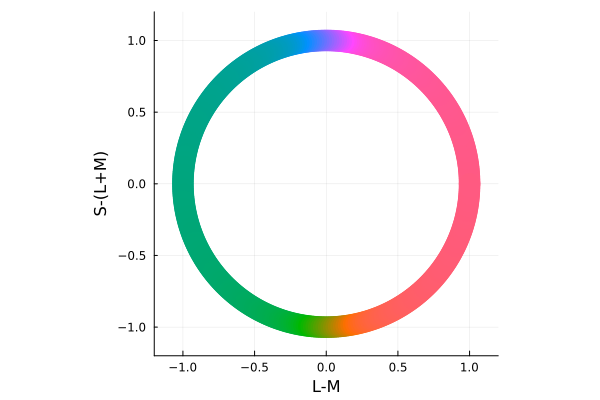

In [48]:
angles = 0:360;lum=0
lumrgb = dehomovector(DKLToRGB*[lum,0,0,1])
DKLIsoLumRGBVec = dehomovector(stack(i->DKLToRGB*RotateXMatrix(deg2rad(i))*[0,1,0,0], angles))
rgb_dklilump = homovector(stack(i->intersectlineunitcube(lumrgb,i),eachslice(DKLIsoLumRGBVec,dims=2)))

cs = [RGBA(i...) for i in eachslice(rgb_dklilump,dims=2)]
cm_lumiso_plane = (colors=cs,notes="The exact DKL max_cone_contrast colors angled[0,360] in lum=$lum plane, constrained by a `$displayname` LCD Display.")
display(cm_lumiso_plane.colors)
plotcolormap(cm_lumiso_plane.colors,xlabel="L-M",ylabel="S-(L+M)",frame=:auto)

### Linear Color Map generated from DKL L-M and S-(L+M) axis colors

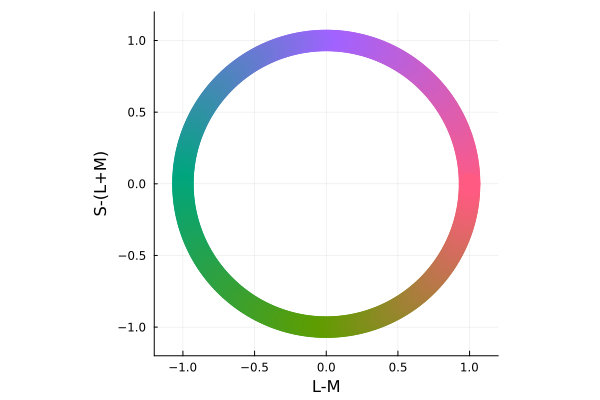

In [49]:
cs = range(L_M➕,S_LM➕,L_M➖,S_LM➖,L_M➕,length=365)
cm_lumiso_planel = (colors=cs,notes="The DKL colors linearly generated from max_cone_contrast colors of L-M and S-(L+M) axis at lum=$lum plane, constrained by a `$displayname` LCD Display.")
display(cm_lumiso_planel.colors)
plotcolormap(cm_lumiso_planel.colors,xlabel="L-M",ylabel="S-(L+M)",frame=:auto)

## DKL IsoLM Plane Color Maps

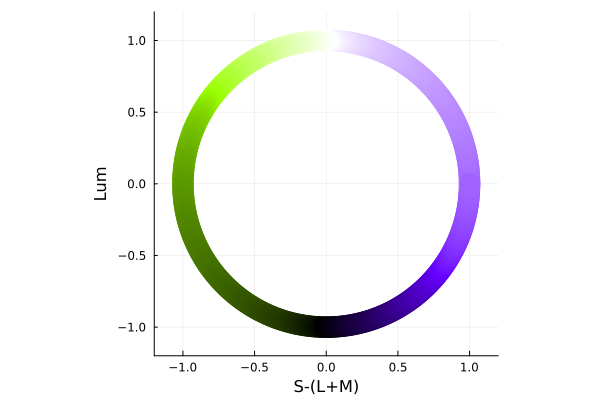

In [50]:
angles = 0:360;lm=0
lmrgb = dehomovector(DKLToRGB*[0,lm,0,1])
DKLIsoLMRGBVec = dehomovector(stack(i->DKLToRGB*RotateYMatrix(deg2rad(i))*[0,0,1,0], angles))
rgb_dklilmp = homovector(stack(i->intersectlineunitcube(lmrgb,i),eachslice(DKLIsoLMRGBVec,dims=2)))

cs = [RGBA(i...) for i in eachslice(rgb_dklilmp,dims=2)]
cm_lmiso_plane = (colors=cs,notes="The exact DKL max_cone_contrast colors angled[0,360] in lm=$lm plane, constrained by a `$displayname` LCD Display.")
display(cm_lmiso_plane.colors)
plotcolormap(cm_lmiso_plane.colors,xlabel="S-(L+M)",ylabel="Lum",frame=:auto)

### Linear Color Map generated from DKL S-(L+M) and Lum axis colors

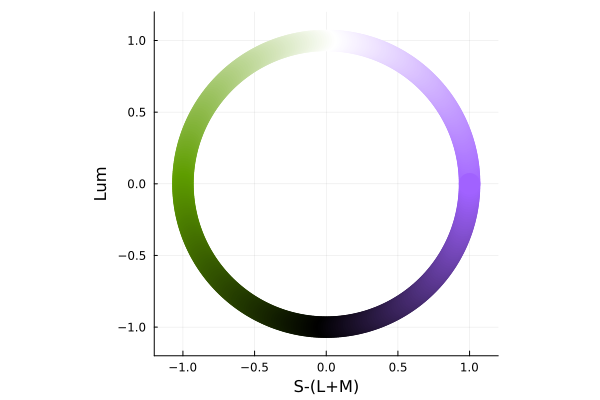

In [51]:
cs = range(S_LM➕,Lum➕,S_LM➖,Lum➖,S_LM➕,length=365)
cm_lmiso_planel = (colors=cs,notes="The DKL colors linearly generated from max_cone_contrast colors of S-(L+M) and Lum axis at lm=$lm plane, constrained by a `$displayname` LCD Display.")
display(cm_lmiso_planel.colors)
plotcolormap(cm_lmiso_planel.colors,xlabel="S-(L+M)",ylabel="Lum",frame=:auto)

## DKL IsoSLM Plane Color Maps

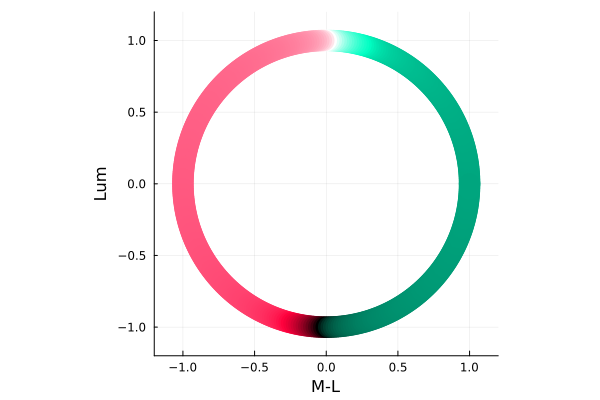

In [52]:
angles = 0:360;slm=0
slmrgb = dehomovector(DKLToRGB*[0,0,slm,1])
DKLIsoSLMRGBVec = dehomovector(stack(i->DKLToRGB*RotateZMatrix(deg2rad(i))*[0,-1,0,0], angles))
rgb_dklislmp = homovector(stack(i->intersectlineunitcube(slmrgb,i),eachslice(DKLIsoSLMRGBVec,dims=2)))

cs = [RGBA(i...) for i in eachslice(rgb_dklislmp,dims=2)]
cm_slmiso_plane = (colors=cs,notes="The exact DKL max_cone_contrast colors angled[0,360] in slm=$slm plane, constrained by a `$displayname` LCD Display.")
display(cm_slmiso_plane.colors)
plotcolormap(cm_slmiso_plane.colors,xlabel="M-L",ylabel="Lum",frame=:auto)

### Linear Color Map generated from DKL M-L and Lum axis colors

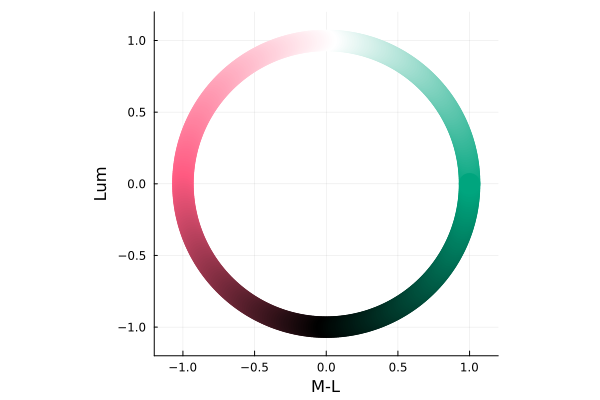

In [53]:
cs = range(L_M➖,Lum➕,L_M➕,Lum➖,L_M➖,length=365)
cm_slmiso_planel = (colors=cs,notes="The DKL colors linearly generated from max_cone_contrast colors of M-L and Lum axis at slm=$slm plane, constrained by a `$displayname` LCD Display.")
display(cm_slmiso_planel.colors)
plotcolormap(cm_slmiso_planel.colors,xlabel="M-L",ylabel="Lum",frame=:auto)

## HSL Hues Color Map

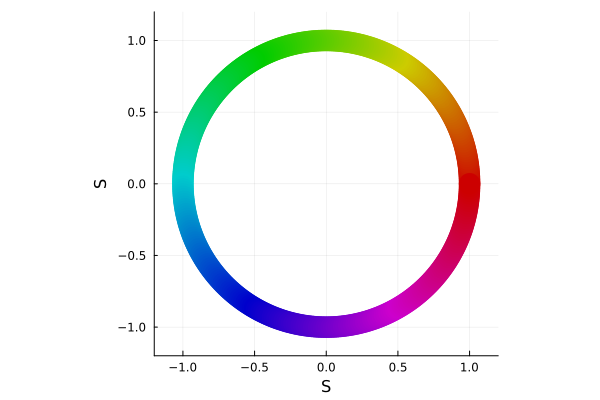

In [54]:
l=0.4
cs = map(i->RGBA(HSLA(i,1,l,1)),0:360)
cm_hsl_hue = (colors=cs, notes="The HSL max_saturated hues angled[0,360] at L=$l.")
display(cm_hsl_hue.colors)
plotcolormap(cm_hsl_hue.colors,xlabel="S",ylabel="S",frame=:auto)

## Save Color Maps

In [55]:
using JLD2
save(joinpath(@__DIR__,"colormaps.jld2"),"lms_mccliso",cm_liso,"lms_mccmiso",cm_miso,"lms_mccsiso",cm_siso,
    "lms_mcclisow",cm_lisow,"lms_mccmisow",cm_misow,"lms_mccsisow",cm_sisow,
    "lms_mcclisob",cm_lisob,"lms_mccmisob",cm_misob,"lms_mccsisob",cm_sisob,
    "dkl_mcclumiso",cm_lumiso,"dkl_mcclmiso",cm_lmiso,"dkl_mccslmiso",cm_slmiso,
    "dkl_mcclmisow",cm_lmisow,"dkl_mccslmisow",cm_slmisow,
    "dkl_mcclmisob",cm_lmisob,"dkl_mccslmisob",cm_slmisob,
    "dkl_mcchue_l$lum",cm_lumiso_plane,"lidkl_mcchue_l$lum",cm_lumiso_planel,
    "dkl_mcchue_lm$lm",cm_lmiso_plane,"lidkl_mcchue_lm$lm",cm_lmiso_planel,
    "dkl_mcchue_slm$slm",cm_slmiso_plane,"lidkl_mcchue_slm$slm",cm_slmiso_planel,
    "hsl_mshue_l$l",cm_hsl_hue)